In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import matplotlib.pyplot as plt
from google.colab import drive

In [2]:
#Initialization of fixed parameters

year = (2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022)
numbers = (517,981,550,283,339,201,381,384,363,396,477,711,761)
#a1 = (1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)

#pop_changing = (151423,156905,162585,168471,174570,180889,187437,194222,201020,208277,215692,223241,230809)

#population= 194222
n_iter = 100000

incidence = []
lower_ci = []
upper_ci = []


#Define alpha and beta values
def getAlphaBeta(mu, sigma):
    alpha=(((1-mu)/sigma**2)-(1/mu))*mu**2
    beta=((1/mu)-1)*alpha

    return alpha, beta

Calculating population

In [3]:
#before 2017
year = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022]
year1= year[0:7]
val_17 = 194222 # population in 2017
percentage=1.0362 # population growth rate for each year (2014-2016)
temp2 = val_17
pop_changing=[]

for i in year1:
  temp2 = temp2/percentage
  temp2 = math.ceil(temp2)
  pop_changing.append(temp2)
pop_changing.reverse()

In [4]:
#after 2017
year2=year[8:13]
per=(3.62, 3.61, 3.56, 3.50, 3.39) # population growth rate for each year (2018-2021)
temp = val_17
for i in year2:
  temp = temp + (temp*per[i-2018]/100)
  temp = math.ceil(temp)
  pop_changing.append(temp)
pop_changing.insert(7, val_17) #inserting population for 2017
pop_changing

[151426,
 156907,
 162587,
 168472,
 174570,
 180889,
 187437,
 194222,
 201253,
 208519,
 215943,
 223502,
 231079]

In [5]:
#Calculate adjusted incidence for each year

for x in year:
  # Define the distribution of cases
  true_incidence = numbers[x-2010]/pop_changing[x-2010]
  cases_dist = np.random.binomial(n=pop_changing[x-2010], p=true_incidence, size=n_iter)

  # Define the distributions of the adjustment factors
  #(alpha1,beta1) = getAlphaBeta(a1[x-2010],0.01)
  #a1_dist = np.random.beta(alpha1, beta1, size=n_iter)

  # Calculate the crude incidence rate
  crude_rate_dist = cases_dist / pop_changing[x-2010]

  # Calculate the adjusted incidence rate
  adjusted_rate_dist = crude_rate_dist
  incidence.append(np.mean(adjusted_rate_dist*100000))
  incidence
  # Calculate the uncertainty intervals (e.g. 95% confidence intervals) for the adjusted incidence rate
  lower_ci.append(np.percentile(adjusted_rate_dist*100000,2.5))
  upper_ci.append(np.percentile(adjusted_rate_dist*100000,97.5))


In [6]:
true_incidence = numbers[0]/pop_changing[0]
cases_dist = np.random.binomial(n=pop_changing[0], p=true_incidence, size=10)

In [7]:
incidence

[341.42500627369145,
 625.306423550256,
 338.31519740200633,
 167.92658720736978,
 194.273655267228,
 111.09692131638738,
 203.25401601604804,
 197.72519590983515,
 180.3568195256717,
 189.94812463132854,
 220.87557827760105,
 318.0648540057807,
 329.2915323330982]

Text(0.5, 1.0, 'Pneumococcal incidence ALL IPD')

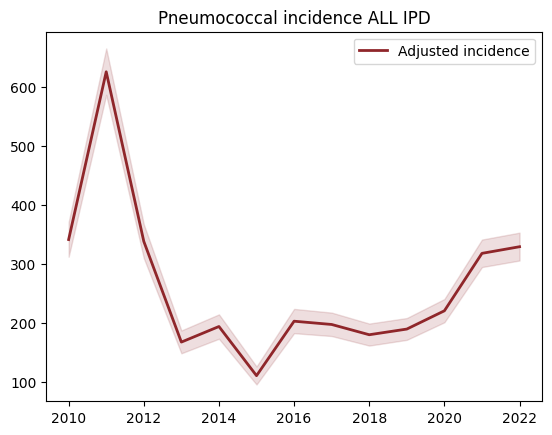

In [8]:
#Plotting the values

plt.plot(year, incidence, '#8F262A', linewidth=2, markersize=12)
#plt.plot(year, lower_ci,'#B298CB', linewidth=2, markersize=12)
#plt.plot(year, upper_ci,'#98CB98', linewidth=2, markersize=12)
plt.fill_between(year, lower_ci, upper_ci, color='#8F262A', alpha=.15)
plt.legend(['Adjusted incidence'])
plt.title("Pneumococcal incidence ALL IPD")

In [9]:
df = pd.DataFrame(
    {'year': year,"incidence":incidence,
     'upper_ci': upper_ci,
     'lower_ci': lower_ci
    })

In [10]:
df

,year,incidence,upper_ci,lower_ci
0,2010,341.425006,371.138378,312.363795
1,2011,625.306424,664.724964,586.334580
2,2012,338.315197,367.188029,309.987883
3,2013,167.926587,187.568261,148.971342
4,2014,194.273655,214.813542,173.569342
5,2015,111.096921,126.596974,96.191587
6,2016,203.254016,224.075289,182.994820
7,2017,197.725196,217.792011,178.146657
8,2018,180.356820,199.251688,161.985163
9,2019,189.948125,208.614083,171.686993


Downloading the dataset

In [11]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [12]:
te=pd.DataFrame(df)
te.to_excel("Clinical pneumonia(Spne) incidence calculation with average HCUS data_04Jan2022_v1.2.xlsx")